In [76]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# # 1. Loading the dataset into python environment


In [77]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [78]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [79]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [80]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

# 2.Cleaning data and checking for null values

In [81]:
df.shape

(891, 12)

In [82]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [83]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [84]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 3.Checking and handling outliers

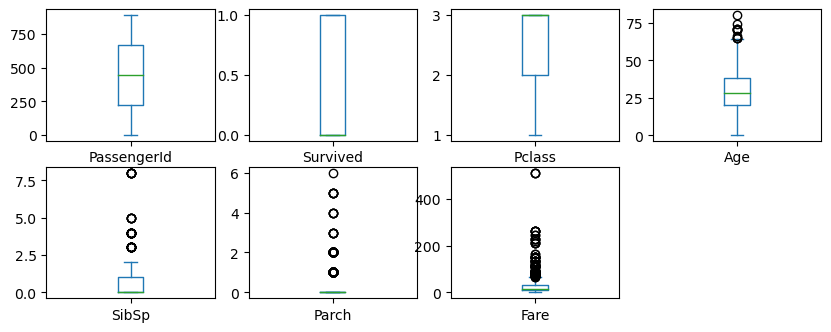

In [85]:
df.plot(kind='box',subplots=True,layout=(7,4),figsize=(10,14));

# We can see outliers in Age, SiSp,Parch and fare columns.

In [86]:
df.corr() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# 4.Dropping the two rows in Embarked where it is null, Also the Name and Ticket Columns were dropped as it is having all unique values.                         The Cabin column is dropped as it is having numerous null values.

In [87]:
df2.dropna(inplace=True, subset=['Embarked'])
df2 = df.drop(columns=['Name','Ticket','Cabin'])
df2


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


# 5.Standardization

In [88]:
##Creating Arrays

In [89]:
data = df2.values

In [90]:
X = data[:, 2:]
X

array([[3, 'male', 22.0, ..., 0, 7.25, 'S'],
       [1, 'female', 38.0, ..., 0, 71.2833, 'C'],
       [3, 'female', 26.0, ..., 0, 7.925, 'S'],
       ...,
       [3, 'female', nan, ..., 2, 23.45, 'S'],
       [1, 'male', 26.0, ..., 0, 30.0, 'C'],
       [3, 'male', 32.0, ..., 0, 7.75, 'Q']], dtype=object)

In [91]:
y = data[:,1]
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

# 6.Splitting the arrays into test and train sets

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [94]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 7)
(179, 7)
(712,)
(179,)


In [95]:
X_train

array([[3, 'male', nan, ..., 0, 23.25, 'Q'],
       [1, 'female', 30.0, ..., 0, 56.9292, 'C'],
       [2, 'female', 34.0, ..., 0, 10.5, 'S'],
       ...,
       [2, 'male', 21.0, ..., 0, 73.5, 'S'],
       [3, 'female', nan, ..., 0, 7.55, 'S'],
       [3, 'male', 21.0, ..., 0, 8.05, 'S']], dtype=object)

# 7.Filling the null values with mode

In [96]:
from sklearn.impute import SimpleImputer

In [97]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [98]:
imputer.fit(X_train[:, 2:3])

SimpleImputer(strategy='most_frequent')

In [99]:
X_train[:, 2:3] = imputer.transform(X_train[:, 2:3])
X_train

array([[3, 'male', 24.0, ..., 0, 23.25, 'Q'],
       [1, 'female', 30.0, ..., 0, 56.9292, 'C'],
       [2, 'female', 34.0, ..., 0, 10.5, 'S'],
       ...,
       [2, 'male', 21.0, ..., 0, 73.5, 'S'],
       [3, 'female', 24.0, ..., 0, 7.55, 'S'],
       [3, 'male', 21.0, ..., 0, 8.05, 'S']], dtype=object)

In [100]:
X_train[:, 2:3] = imputer.transform(X_train[:, 2:3])
X_train

array([[3, 'male', 24.0, ..., 0, 23.25, 'Q'],
       [1, 'female', 30.0, ..., 0, 56.9292, 'C'],
       [2, 'female', 34.0, ..., 0, 10.5, 'S'],
       ...,
       [2, 'male', 21.0, ..., 0, 73.5, 'S'],
       [3, 'female', 24.0, ..., 0, 7.55, 'S'],
       [3, 'male', 21.0, ..., 0, 8.05, 'S']], dtype=object)

In [101]:
X_test[:, 2:3] = imputer.transform(X_test[:, 2:3])
X_test

array([[1, 'female', 48.0, ..., 0, 25.9292, 'S'],
       [3, 'male', 24.0, ..., 0, 7.8958, 'S'],
       [2, 'female', 17.0, ..., 0, 10.5, 'S'],
       ...,
       [3, 'male', 24.0, ..., 0, 7.7333, 'Q'],
       [3, 'male', 21.0, ..., 0, 7.7333, 'Q'],
       [3, 'female', 5.0, ..., 1, 19.2583, 'C']], dtype=object)

# 8. Encoding Sex and Embarked columns using OneHotEncoder

In [102]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [103]:
ct = ColumnTransformer(transformers=[('encode', OneHotEncoder(),[1,-1])], remainder='passthrough')

In [104]:
X_train = ct.fit_transform(X_train)

In [105]:
X_train

array([[0.0, 1.0, 0.0, ..., 2, 0, 23.25],
       [1.0, 0.0, 1.0, ..., 0, 0, 56.9292],
       [1.0, 0.0, 0.0, ..., 0, 0, 10.5],
       ...,
       [0.0, 1.0, 0.0, ..., 0, 0, 73.5],
       [1.0, 0.0, 0.0, ..., 0, 0, 7.55],
       [0.0, 1.0, 0.0, ..., 0, 0, 8.05]], dtype=object)

In [106]:
X_test = ct.transform(X_test)

In [107]:
X_test

array([[1.0, 0.0, 0.0, ..., 0, 0, 25.9292],
       [0.0, 1.0, 0.0, ..., 0, 0, 7.8958],
       [1.0, 0.0, 0.0, ..., 0, 0, 10.5],
       ...,
       [0.0, 1.0, 0.0, ..., 0, 0, 7.7333],
       [0.0, 1.0, 0.0, ..., 0, 0, 7.7333],
       [1.0, 0.0, 1.0, ..., 2, 1, 19.2583]], dtype=object)